# **Lesson_4.2**

## In this lecture

* Fork repository

* In-class exercise
* **Scikit-learn** Python library
* ML model selection (again)
* Unsupervised ML
* **K-means** clustering
* In-class exercise

---

## In-class exercise

#### Objective

* Load dataset from internet (provided)

* Handle non-standard CSV formatting (example shown)
* Inspect data
* Handle missing values
* Sort by performance metric
* Visualise using seaborn:
	* Plot selected feature as a function of car weight
	
	* Plot mpg boxplots for various number of cylinders

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Provide the URL and read csv
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
df = pd.read_csv(url)

In [3]:
# Inspect how the dataset looks like
df.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In [7]:
# The data format is messy. It has to be fixed first
column_names = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

df = pd.read_csv(
    url,
    sep=r"\s+",
    names=column_names,
    na_values="?"    
    )

In [6]:
df.head()


,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


<class 'pandas.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    str    
dtypes: float64(5), int64(3), str(1)
memory usage: 30.6 KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.0000

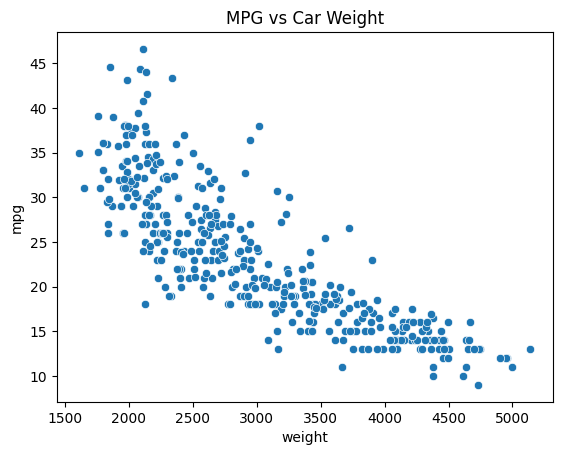

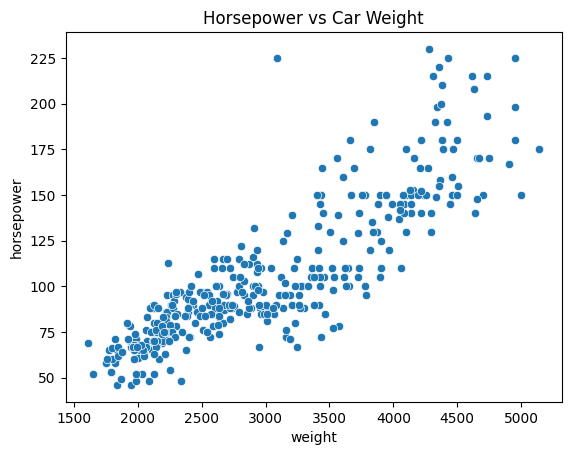

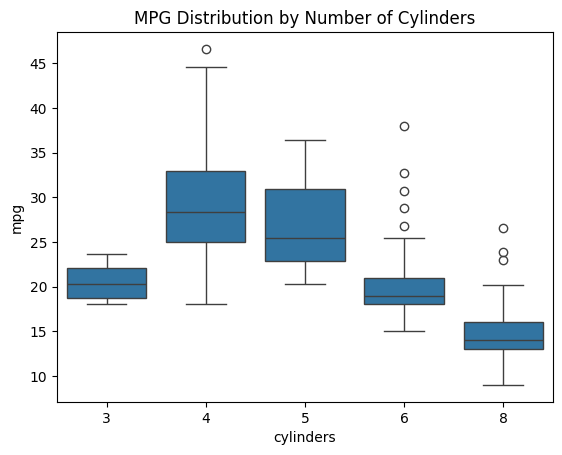

In [13]:
# Write the rest of your code here ...
print(df.info())
print(df.describe())

print (df.isna().sum()) #check missing values 
df = df.dropna()
df_sorted = df.sort_values(by="mpg", ascending=False)
print(df_sorted.head(10))

sns.scatterplot(data=df, x="weight", y="mpg")
plt.title("MPG vs Car Weight")
plt.show()

sns.scatterplot(data=df, x="weight", y="horsepower")
plt.title("Horsepower vs Car Weight")
plt.show()

sns.boxplot(data=df, x="cylinders", y="mpg")
plt.title("MPG Distribution by Number of Cylinders")
plt.show()


---

## Scikit-learn (structure)

#### <u>**Scikit-learn** is a Python library that makes machine learning practical and accessible. It provides all the essential tools needed to build a complete machine learning pipeline — from data preprocessing to model training and evaluation</u>

### Core scikit-learn Modules
`sklearn.linear_model` **Linear and logistic regression models for regression and classification tasks**

`sklearn.tree`  **Decision tree algorithms for classification and regression**

`sklearn.ensemble` **Ensemble methods like Random Forest and Gradient Boosting that combine multiple models**

`sklearn.svm` **Support Vector Machines for classification and regression**

`sklearn.neighbors` **K-Nearest Neighbors algorithms for classification and regression**

`sklearn.naive_bayes` **Probabilistic classifiers based on Bayes’ theorem**

`sklearn.neural_network` **Basic feedforward neural networks for classification and regression**

### Model Selection & Evaluation
`sklearn.model_selection` **Tools for train/test splitting, cross-validation, and hyperparameter tuning**

`sklearn.metrics` **Performance metrics like accuracy, precision, recall, MSE, ROC-AUC**

### Data Preprocessing
`sklearn.preprocessing` **Scaling, encoding, normalization, and feature transformations**

`sklearn.impute` **Handling missing values**

`sklearn.feature_selection` **Selecting the most relevant features for modeling**

`sklearn.decomposition` **Dimensionality reduction techniques like PCA**

### Clustering & Unsupervised Learning
`sklearn.cluster` **Clustering algorithms like K-Means and DBSCAN**

`sklearn.mixture` **Gaussian Mixture Models for probabilistic clustering**

`sklearn.manifold` **Manifold learning techniques like t-SNE and Isomap**

### Pipelines & Utilities
`sklearn.pipeline` **Builds ML pipelines to chain preprocessing and models**

`sklearn.compose` **Combines different preprocessing steps for different feature types**

`sklearn.utils` **Utility functions used internally and for advanced workflows**

### Datasets
`sklearn.datasets` **Built-in toy datasets and dataset loading utilities**

[Scikit-learn user's guide](https://scikit-learn.org/stable/user_guide.html)

[Scikit-learn page](https://pypi.org/project/scikit-learn/)

---

## ML model selection (again)

<p align="center">
<img src="../assets/img/model_selection_v1.jpg" width="800">
</p>

### **Supervised** vs. **Unsupervised** ML. What is the difference?

![Buttons](https://rainydaymum.co.uk/wp-content/uploads/2016/04/button-box-abc-3.jpg)

[Source](https://rainydaymum.co.uk)


* Supervised: learning from **labeled** data in a training dataset. Examples:
	* Classification
	* Regression
* Unsupervised: learning from **unlabeled** data. Algorithm tries to find hidden patterns in dataset without being told what they are
	* Clustering (one example) - grouping similar data together. Trying to find the best way to group. Applications: customer segmentation, document grouping, anomaly detection, fraud detection ...

### K-means clustering
* **K-means clustering** is an *unsupervised* machine learning algorithm used to group similar data points into clusters based on their proximity to **cluster centroids**
* ***k*** number of clusters is a **hyperparameter**

<p align="center">
	<img src="../assets/img/k-means_2.png" width="900">
</p>

We all belong to a cluster

<p align="center">
<img src="../assets/img/k-means_1_v1.png" width="800">
</p>

[Image source](https://www.lancaster.ac.uk/stor-i-student-sites/harini-jayaraman/k-means-clustering/)

### Centroid
* In k-means clustering, a **centroid** represents the center of a cluster
* It is typically calculated as the mean of all data points within that cluster
* The algorithm aims to find these centroids such that data points are grouped into clusters where points within each cluster are closer to their respective centroid than to any other cluster's centroid
* Centroid might not necessarily be a member of the dataset

---

## Clustering of mall customers

### Import libraries

In [16]:
from sklearn.cluster import KMeans

[Kmeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Import data

In [17]:
df = pd.read_csv('../datasets/mall_customers_k-means.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### EDA

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [20]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Rename columns

In [23]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'
                   }, inplace=True)

In [24]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data graphical overview - sns pairplot

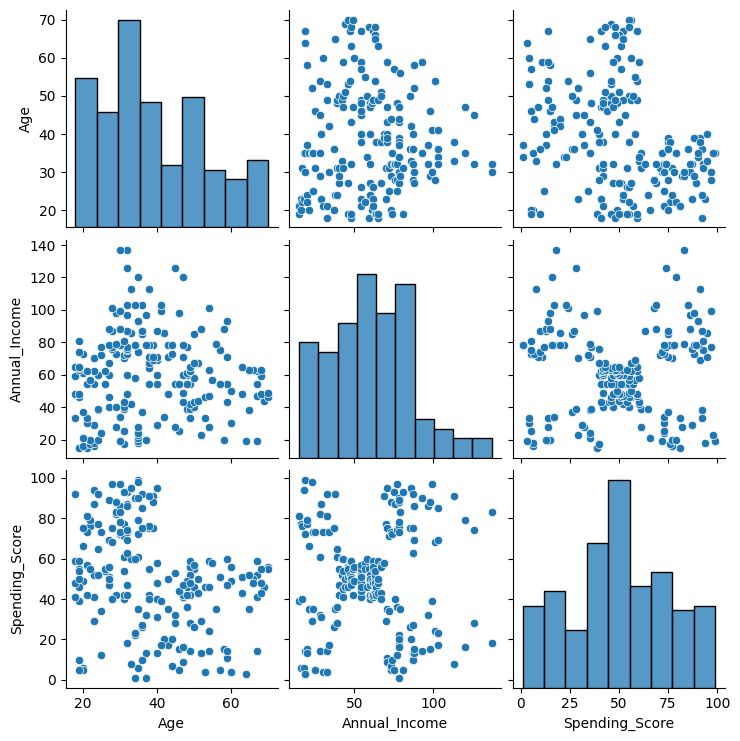

In [25]:
sns.pairplot(data=df[['Age', 'Annual_Income', 'Spending_Score']])
plt.show()

##### There is obvious clustering if we look at **Annual_Income** vs, **Spending_Score**
* Let's have a closer look

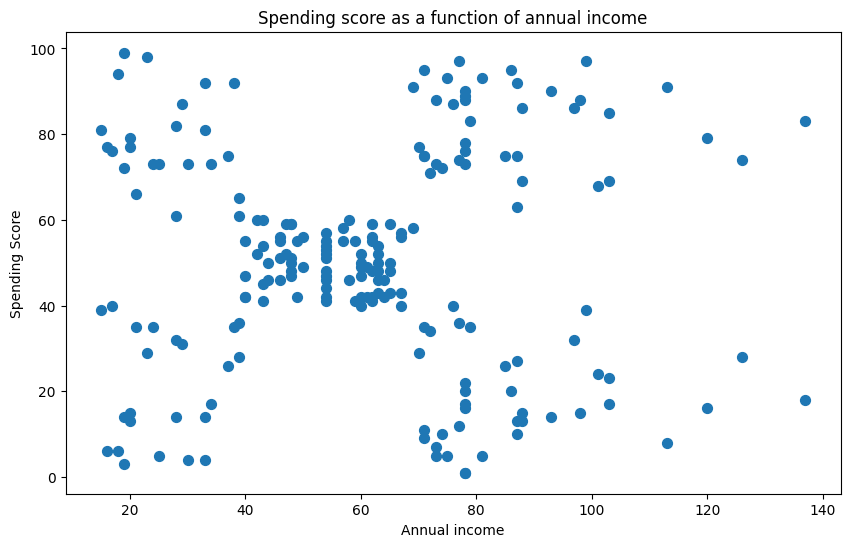

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], s=50)
plt.title('Spending score as a function of annual income')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='str')

### Applying k-means model to our dataset (pair of features of interest)

#### Select features for clustering

In [28]:
X = df[['Annual_Income', 'Spending_Score']]

### **Elbow** method to figure out the number of clusters

* One has to be minimalistic in selecting number of clusters
* Number of lusters must be as small as possible, and yet still make sense

#### WCSS - Within-cluster sum of squares
* Quantifies how close the data points in a cluster are to the cluster centroid
* Lower WCSS means tighter, more compact clusters
* As you increase *k* (the number of clusters), WCSS decreases, but with diminishing returns
* This is why the elbow method is used to find the optimal number of clusters — by plotting WCSS vs. number of clusters and finding the "elbow" point
* <u>**Number of clusters is a hyperparameter!**</u>

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#### WCSS vs. cluster number "elbow" plot

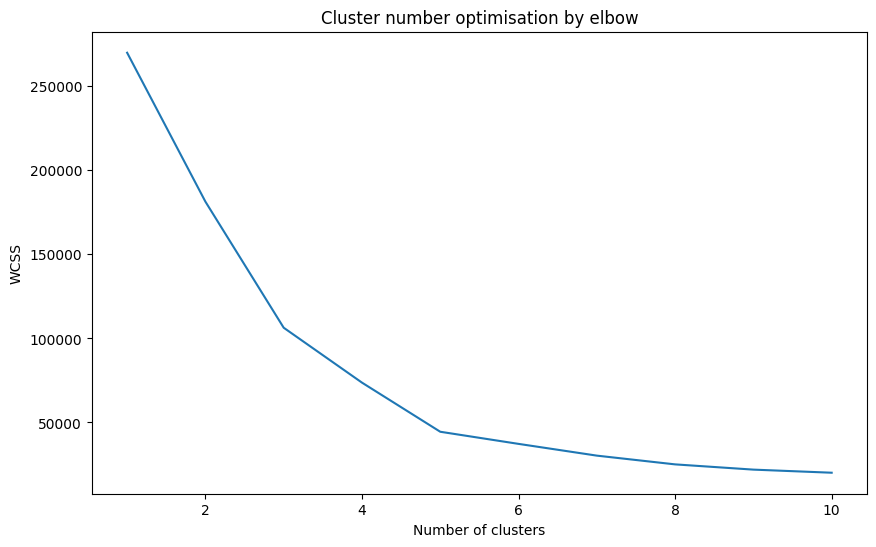

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()

Above: optimal number of clusters is 5.

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [35]:
y_kmeans = kmeans.fit_predict(X)

In [36]:
df['Cluster'] = y_kmeans

In [37]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


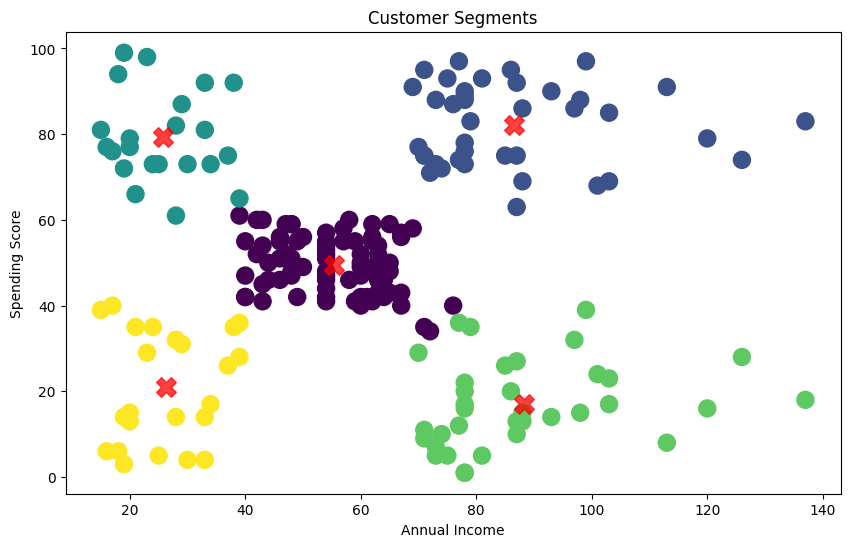

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=150, cmap='viridis')  # review slicing through iterables; 0, 1 stands for columns
centers = kmeans.cluster_centers_  # Retrieves coordinates of cluster centers
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=.75, marker='X')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

Needs interpretation

#### How much people spend within each cluster?

In [39]:
avg_spending_income_in_cluster = df.groupby("Cluster")[["Spending_Score", "Annual_Income"]].mean().sort_index()

avg_spending_income_in_cluster


,Spending_Score,Annual_Income
Cluster,,
0,49.518519,55.296296
1,82.128205,86.538462
2,79.363636,25.727273
3,17.114286,88.200000
4,20.913043,26.304348


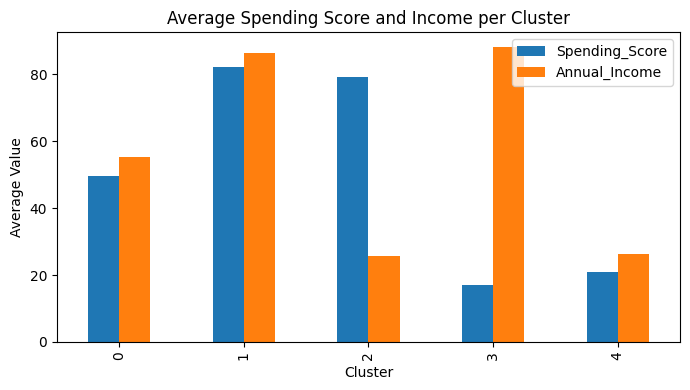

In [40]:
avg_spending_income_in_cluster.plot(
    kind="bar",
    figsize=(7, 4)
)
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.title("Average Spending Score and Income per Cluster")
plt.tight_layout()
plt.show()


* We start seeing some sense, but...
* Still some more (deeper) analysis is required

---

### In-class exercise
Perform similar anapysis for two other pairs of numerucal features in the this dataset.

---

### K-means clustering using all three numerical features

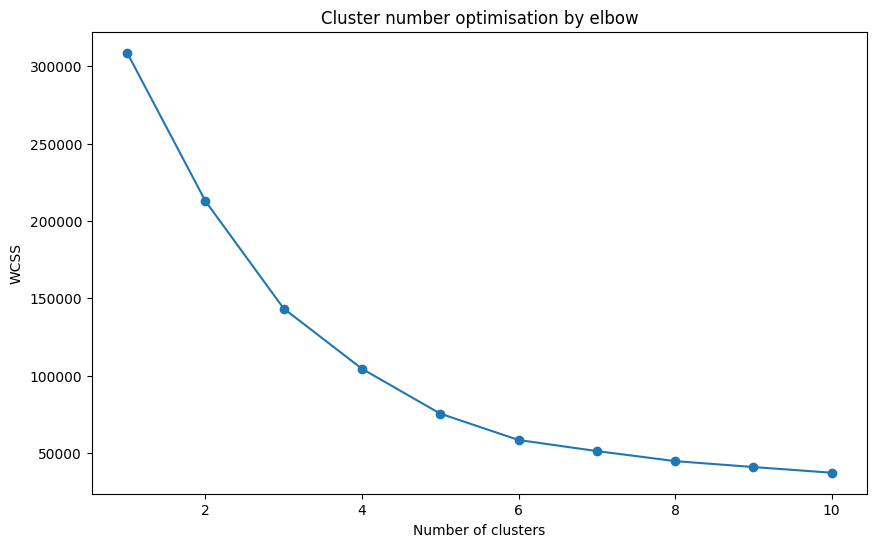

In [41]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()


Optimal number of clusters is 6

In [42]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [43]:
df['Cluster_Age_Income_Spend'] = y_kmeans

In [44]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,Cluster_Age_Income_Spend
0,1,Male,19,15,39,4,5
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,5
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,5


## Visualising clusters in 3D

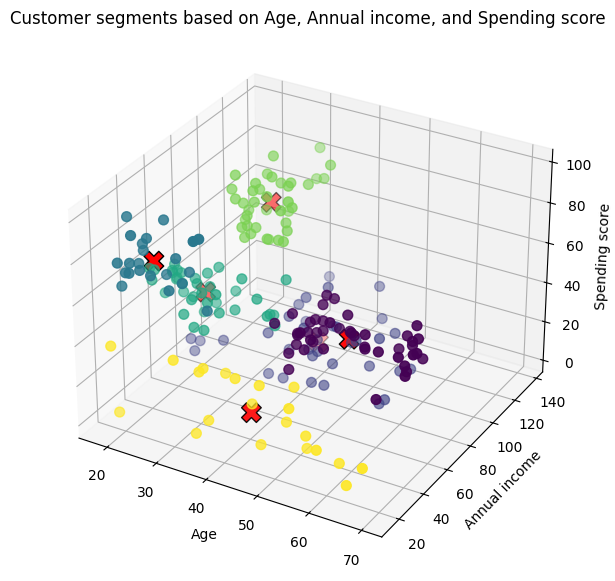

In [45]:
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df['Age'],
    df['Annual_Income'],
    df['Spending_Score'],
    c=df['Cluster_Age_Income_Spend'],
    s=50,
    cmap='viridis'
)
ax.scatter(
    centroids[:, 0],  # Age
    centroids[:, 1],  # Annual Income
    centroids[:, 2],  # Spending Score
    s=200,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)
ax.set_xlabel("Age")
ax.set_ylabel("Annual income")
ax.set_zlabel("Spending score")
plt.title("Customer segments based on Age, Annual income, and Spending score")
plt.show()

## Prediction

#### Prepare input
The new person (customer) is:
* Age: 30
* Annual income: 60k
* Spending score: 50

#### Create input for this customer:

In [46]:
# new_customer = np.array([[30, 60, 50]])
new_customer_df = pd.DataFrame([[30, 60, 50]], columns=['Age', 'Annual_Income', 'Spending_Score'])  # N.b.: _2D_array_

#### Predict the cluster

In [47]:
cluster_label = kmeans.predict(new_customer_df)
print(f"The customer belongs to cluster: {cluster_label[0]}")

The customer belongs to cluster: 3


#### Print a distance from a cluster centroid

In [48]:
distances = kmeans.transform(new_customer_df)
print("Distances to cluster centers:", distances)

Distances to cluster centers: [[26.99624116 44.76195542 45.37829969  4.57425652 41.75835277 48.41321103]]


### In class exercice:
Plot bar diagram of all three parameters for each cluster

---

##### Reminder: do not forget to **Clear All Outputs**
### Now you can commit and push your code to **GitHub**